<a href="https://colab.research.google.com/github/harishrsk55/Autism-spectrum-analyser/blob/main/AQTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("fabdelja/autism-screening-for-toddlers")

print("Path to dataset files:", path)

100%|██████████| 53.2k/53.2k [00:00<00:00, 3.17MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fabdelja/autism-screening-for-toddlers/versions/1


In [2]:
import pandas as pd

df = pd.read_csv('/root/.cache/kagglehub/datasets/fabdelja/autism-screening-for-toddlers/versions/1/Toddler Autism dataset July 2018.csv')
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [ ]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [3]:
x = df[['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10']]
y = df[['Class/ASD Traits ']]

In [4]:
# Map 'yes' to 1 and 'no' to 0
y = y.replace({'Yes': 1, 'No': 0})

<ipython-input-4-f127b74fc6c5>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'Yes': 1, 'No': 0})


In [5]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to your data
X_resampled, y_resampled = smote.fit_resample(x, y)

# Check the class distribution after resampling
print("Original dataset shape:", Counter(y))
print("Resampled dataset shape:", Counter(y_resampled))


Original dataset shape: Counter({'Class/ASD Traits ': 1})
Resampled dataset shape: Counter({'Class/ASD Traits ': 1})


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

In [9]:
x_train.shape

(1164, 10)

In [10]:
y_test.columns

Index(['Class/ASD Traits '], dtype='object')

<Axes: xlabel='Class/ASD Traits ', ylabel='count'>

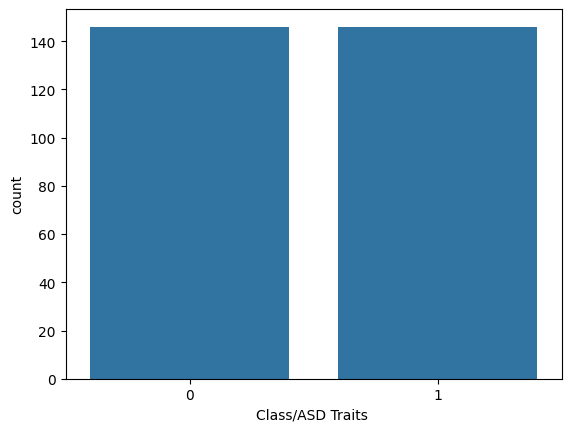

In [12]:
import seaborn as sns

sns.countplot(x='Class/ASD Traits ', data=y_test)


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import pandas as pd

# # Ensure numeric data
# x_train = x_train.apply(pd.to_numeric, errors='coerce').fillna(0)
# y_train = y_train.apply(pd.to_numeric, errors='coerce').fillna(0)
# x_test = x_test.apply(pd.to_numeric, errors='coerce').fillna(0)
# y_test = y_test.apply(pd.to_numeric, errors='coerce').fillna(0)

# Define the model
model = Sequential([
    Input(shape=(x_train.shape[1],)),  # Automatically use the number of features
    Dense(1, activation='sigmoid'),
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3784 - loss: 1.0196 - val_accuracy: 0.3820 - val_loss: 0.9084
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3250 - loss: 0.9148 - val_accuracy: 0.3948 - val_loss: 0.8010
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3585 - loss: 0.7930 - val_accuracy: 0.4721 - val_loss: 0.7186
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4391 - loss: 0.7511 - val_accuracy: 0.6180 - val_loss: 0.6583
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5377 - loss: 0.6964 - val_accuracy: 0.6524 - val_loss: 0.6134
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5377 - loss: 0.6526 - val_accuracy: 0.6609 - val_loss: 0.5796
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5464 - loss: 0.6382 - val_accuracy: 0.6524 - val_loss: 0.5529
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5757 - loss: 0.6123 - val_accuracy: 0.7468 - val_loss:

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


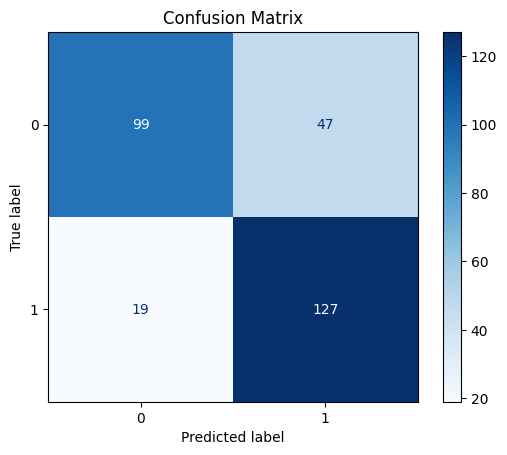

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get model predictions
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary classes (0 or 1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [15]:
y_pred = model.predict(x_test)
y_pred

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[0.84250015],
       [0.48075265],
       [0.79326147],
       [0.65222406],
       [0.7495254 ],
       [0.76084095],
       [0.77919805],
       [0.47662494],
       [0.7080094 ],
       [0.41778046],
       [0.5287138 ],
       [0.84335065],
       [0.65605915],
       [0.7781046 ],
       [0.48204058],
       [0.5651572 ],
       [0.29881135],
       [0.47662494],
       [0.3927913 ],
       [0.67232   ],
       [0.54367113],
       [0.45177728],
       [0.48874268],
       [0.48874268],
       [0.47662494],
       [0.43971467],
       [0.84335065],
       [0.47662494],
       [0.65518135],
       [0.48874268],
       [0.5087832 ],
       [0.43815237],
       [0.47662494],
       [0.42377087],
       [0.3454227 ],
       [0.3927913 ],
       [0.5601417 ],
       [0.652182  ],
       [0.34313872],
       [0.5146622 ],
       [0.42377087],
       [0.84335065],
       [0.4143471 ],
       [0.47822762],
       [0.7048543 ],
       [0.46992087],
       [0.40442455],
       [0.462